In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Division by Newton-Raphson method
- initial guess
- number of iteration

/tmp/ipykernel_11933/3659336559.py:3: RuntimeWarning: overflow encountered in double_scalars
  number = number*(2-a*number)


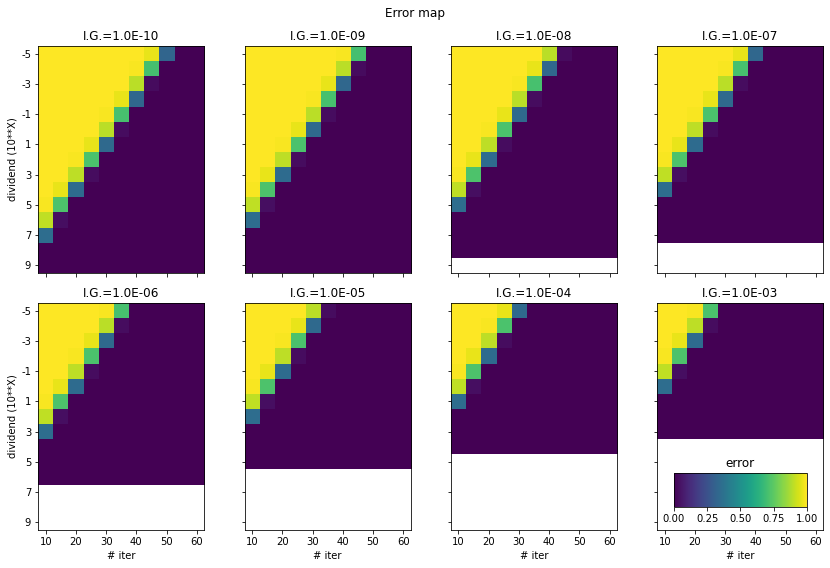

In [3]:
def newton_raphson_method(a, number=1e-6, n_iters = 70):
    for i in range(n_iters): 
        number = number*(2-a*number)
    return number


arr1 = np.arange(-5,10)
arr2 = np.array([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3])
arr3 = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
rerr_map = np.zeros((len(arr1), len(arr2), len(arr3)))
aerr_map = np.zeros((len(arr1), len(arr2), len(arr3)))

for i, a in enumerate(10.**arr1):
    for j, nn in enumerate(arr2):
        for k, it in enumerate(arr3):
            guess = newton_raphson_method(a, nn, it)
            ans = 1./a
            rerr = (ans - guess)/ans
            aerr = ans - guess
            rerr_map[i,j,k] = rerr
            aerr_map[i,j,k] = aerr

fig, axs = plt.subplots(2,4, sharex=True, sharey=True)
fig.set_size_inches(12, 8)
axs = axs.ravel()
for i, ax in enumerate(axs):
    cb = ax.imshow(rerr_map[:,i,:], vmax=1, vmin=0)
    ax.set_title(f"I.G.={arr2[i]:.1E}")

axs = axs.reshape(2,4)

for ax in axs[:,0]:
    ax.set_ylabel("dividend (10**X)")
    ind = np.arange(0, len(arr1), 2)
    ax.set_yticks(ind, labels=arr1[ind])

for ax in axs[1,:]:
    ax.set_xlabel("# iter")
    ind = np.arange(0, len(arr3), 2)
    ax.set_xticks(ind, labels=arr3[ind])

fig.suptitle("Error map")
plt.tight_layout()

cbaxes = axs[-1,-1].inset_axes([0.1, 0.1, 0.8, 0.15])
cbaxes.set_title("error")
fig.colorbar(cb, cax=cbaxes, orientation="horizontal")
plt.savefig("Newton-Raphson_Error_maps.png")

plt.show()

# sign function
## Cheon ... 

### error

$ \vert f_n^{(d)} - sgn(x) \vert \leq 2^{-\alpha} $, when d and $\alpha$ statisfies the following relation.  
<Theorem 1>
ddf
dsd




In [1]:
# Calculate error bound 

In [ ]:
# approximate sign function 



In [8]:
0x5f375a86 

1597463174

# SQRT

https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Iterative_methods_for_reciprocal_square_roots

First find the reciprocal root, $ \frac{1}{\sqrt{x}} $, then $\sqrt{x} = x \cdot \frac{1}{\sqrt{x}} $. 

This method converges only when started from a **good** initial guess

## Newton's method 
https://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3j/3j_2content_2.html#:~:text=Newton's%20method%20for%20solving%20equations,requires%20calculus%2C%20in%20particular%20differentiation.

$ x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}$

### And example 

find $\sqrt(2)$ by finding the root of $f(x) = x^2 - 2 = 0$

In [7]:
f_x = lambda x : x**2 -2
f_p_x = lambda x : 2*x

val = 3
for i in range(10):
    val = val - f_x(val)/f_p_x(val)
    print(i, val)

0 1.8333333333333333
1 1.4621212121212122
2 1.4149984298948028
3 1.4142137800471977
4 1.4142135623731118
5 1.414213562373095
6 1.4142135623730951
7 1.414213562373095
8 1.4142135623730951
9 1.414213562373095


... -> https://github.com/pandasamanvaya/Pivot-tangent/blob/main/inv_sqr_comp/inv_sqrt_comp.cpp  

requires: SEAL, numpy (c++ lib)

